In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def conv_2_block (in_dim, out_dim):
    model= nn.Sequential(
                nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
                nn.ReLU(),
                nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
                nn.ReLU(),
                nn.MaxPool2d(2,2))
    return model

In [3]:
def conv_3_block(in_dim,out_dim):
    model=nn.Sequential(
                nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
                nn.ReLU(),
                nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
                nn.ReLU(),
                nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
                nn.ReLU(),
                nn.MaxPool2d(2,2))
    return model

In [4]:
class VGG(nn.Module):
    def __init__(self, base_dim,num_classes=10):
        super(VGG,self).__init__()
        self.feature=nn.Sequential(
            conv_2_block(3,base_dim),
            conv_2_block(base_dim,2*base_dim),
            conv_3_block(2*base_dim,4*base_dim),
            conv_3_block(4*base_dim,8*base_dim),
            conv_3_block(8*base_dim,8*base_dim))
        self.fc_layer=nn.Sequential(
                nn.Linear(8*base_dim*1*1, 4096),
                nn.ReLU(),
                nn.Dropout(),
                nn.Linear(4096,1000),
                nn.ReLU(),
                nn.Dropout(),
                nn.Linear(1000,num_classes)
                )
    def forward(self,x):
        x= self.feature(x)
        x=x.view(x.size(0),-1)
        x=self.fc_layer(x)
        return x

In [5]:
batch_size=100
learning_rate=0.0002
num_epoch=10

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model=VGG(base_dim=64).to(device)

loss_fc=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
transform=transforms.Compose(
            [transforms.ToTensor(),#텐서화
             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])#(mean1,mean2,mena3),(std1,std2,std3) 정규화 채널 3개

In [8]:
cifar10_train=datasets.CIFAR10(root='./Data', train=True, transform=transform, target_transform=None, download=True)
cifar10_test=datasets.CIFAR10(root='./Data',train=False, transform=transform, target_transform=None, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
train_loader=DataLoader(cifar10_train, batch_size=batch_size,shuffle=True,num_workers=2)
test_loader=DataLoader(cifar10_test,batch_size=batch_size,shuffle=True,num_workers=2)

torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([3, 444, 274])
torch.Size([3, 444, 274])
(3, 444, 274)


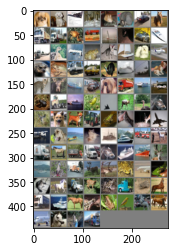

  dog   dog plane  deer   cat   cat   car horse truck truck  frog truck  ship   cat   car  ship truck  bird plane  frog   cat  ship   dog plane   dog  frog truck   car  bird  ship plane   dog   cat  deer  ship truck   dog truck  ship plane  frog truck  ship  bird plane  deer  bird horse  deer   dog   dog truck  frog   cat  deer plane plane   dog  ship   dog  ship  ship truck horse truck horse truck truck horse  ship  ship  deer  ship  bird truck  deer  deer  frog plane  frog   cat horse truck  deer  frog truck  frog horse truck  ship horse  frog  frog  bird horse horse plane horse  bird truck


In [11]:
def imshow(img):
    print(img.shape)
    img=img/2 + 0.5 #unnormalize
    print(img.shape)
    npimg= img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter= iter(train_loader)
print(dataiter)
images, labels=dataiter.next()
print(images.shape)
print(labels.shape)
imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [12]:
for epoch in range(num_epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels= data
        inputs=inputs.to(device)
        labels=labels.to(device)
        optimizer.zero_grad()
        
        output = model(inputs)
        loss=loss_fc(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 10 == 0:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

[1,     1] loss: 0.001
[1,    11] loss: 0.012
[1,    21] loss: 0.012
[1,    31] loss: 0.012
[1,    41] loss: 0.012
[1,    51] loss: 0.012
[1,    61] loss: 0.012
[1,    71] loss: 0.012
[1,    81] loss: 0.012
[1,    91] loss: 0.012
[1,   101] loss: 0.012
[1,   111] loss: 0.012
[1,   121] loss: 0.012
[1,   131] loss: 0.012
[1,   141] loss: 0.012
[1,   151] loss: 0.012
[1,   161] loss: 0.012
[1,   171] loss: 0.012
[1,   181] loss: 0.012
[1,   191] loss: 0.012
[1,   201] loss: 0.012
[1,   211] loss: 0.012
[1,   221] loss: 0.012
[1,   231] loss: 0.012
[1,   241] loss: 0.012
[1,   251] loss: 0.012
[1,   261] loss: 0.012
[1,   271] loss: 0.011
[1,   281] loss: 0.011
[1,   291] loss: 0.011
[1,   301] loss: 0.011
[1,   311] loss: 0.011
[1,   321] loss: 0.011
[1,   331] loss: 0.010
[1,   341] loss: 0.011
[1,   351] loss: 0.010
[1,   361] loss: 0.010
[1,   371] loss: 0.010
[1,   381] loss: 0.010
[1,   391] loss: 0.010
[1,   401] loss: 0.010
[1,   411] loss: 0.010
[1,   421] loss: 0.010
[1,   431] 

[8,    71] loss: 0.003
[8,    81] loss: 0.003
[8,    91] loss: 0.003
[8,   101] loss: 0.003
[8,   111] loss: 0.003
[8,   121] loss: 0.003
[8,   131] loss: 0.003
[8,   141] loss: 0.003
[8,   151] loss: 0.003
[8,   161] loss: 0.004
[8,   171] loss: 0.003
[8,   181] loss: 0.003
[8,   191] loss: 0.003
[8,   201] loss: 0.003
[8,   211] loss: 0.003
[8,   221] loss: 0.003
[8,   231] loss: 0.003
[8,   241] loss: 0.003
[8,   251] loss: 0.003
[8,   261] loss: 0.003
[8,   271] loss: 0.003
[8,   281] loss: 0.003
[8,   291] loss: 0.003
[8,   301] loss: 0.003
[8,   311] loss: 0.003
[8,   321] loss: 0.003
[8,   331] loss: 0.003
[8,   341] loss: 0.003
[8,   351] loss: 0.003
[8,   361] loss: 0.003
[8,   371] loss: 0.003
[8,   381] loss: 0.003
[8,   391] loss: 0.003
[8,   401] loss: 0.003
[8,   411] loss: 0.003
[8,   421] loss: 0.003
[8,   431] loss: 0.003
[8,   441] loss: 0.003
[8,   451] loss: 0.003
[8,   461] loss: 0.003
[8,   471] loss: 0.003
[8,   481] loss: 0.003
[8,   491] loss: 0.003
[9,     1] 

In [ ]:
correct = 0
total = 0

model.eval()

with torch.no_grad():
    for image label in test_loader:
        x=image.to(device)
        y=label.to(device)
        
        output=model(x)
        _,output_index=torch.max(output,1)
        
        total +=label.size(0)
        correct +=(output_index ==y).sum().float()

In [15]:

correct = 0
total = 0

model.eval()

with torch.no_grad():
    for image,label in test_loader:
    
        x = image.to(device)
        y= label.to(device)
.
        output = model.forward(x)
        _,output_index = torch.max(output,1)
        print(output_index.shape)
        
        print(label.shape)
        print(image.shape)
        
        total += label.size(0)
        correct += (output_index == y).sum().float()
    
    # 정확도 도출
    print("Accuracy of Test Data: {}%".format(100*correct/total))

torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.Size([100])
torch.Size([100, 3, 32, 32])
torch.Size([100])
torch.S